In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
beer = pd.read_csv("beer.csv")
beer.head()

,Gender,Married,Income,Age,Preference
0,F,No,31779,46,Regular
1,M,Yes,32739,50,Regular
2,M,Yes,24302,46,Regular
3,M,Yes,64709,70,Regular
4,M,Yes,41882,54,Regular


In [24]:
beer.dtypes

Gender        object
Married       object
Income         int64
Age            int64
Preference    object
dtype: object

In [6]:
# Here, I saw that Gender, Married and Preference are (string) categorical variable. In order to make computations
# simpler, I will convert these to values "0" and "1".
# Gender: M = 1, F = 0
# Married: Yes = 1, No = 0
# Preference: Regular = 1, Light = 0

In [49]:
beer['Gender'] = beer['Gender'].replace({'M': 1, 'F': 0})
beer['Married'] = beer['Married'].replace({'Yes': 1, 'No': 0})
beer['Preference'] = beer['Preference'].replace({'Regular': 1, 'Light': 0})
beer.head()

,Gender,Married,Income,Age,Preference
0,0,0,31779,46,1
1,1,1,32739,50,1
2,1,1,24302,46,1
3,1,1,64709,70,1
4,1,1,41882,54,1


In [ ]:
# Now, I will check for null and missing values.

In [14]:
null_values = beer.isnull().sum()
null_values

Gender        0
Married       0
Income        0
Age           0
Preference    0
dtype: int64

In [15]:
# As, we can see there are no null values, so we are done cleaning this dataset.
# Now, I can start exploring this dataset.

In [20]:
beer.shape

(100, 5)

In [21]:
beer.nunique()

Gender          2
Married         2
Income        100
Age            47
Preference      2
dtype: int64

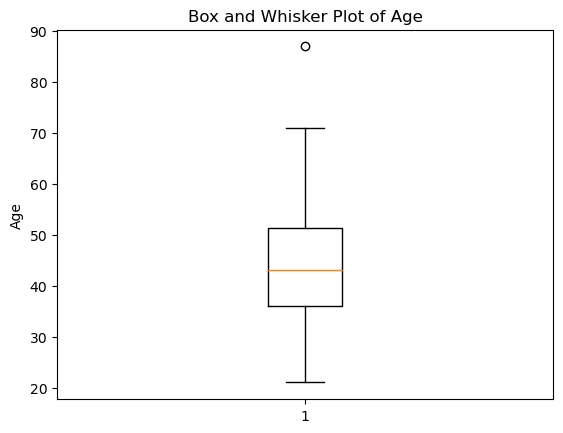

In [26]:
fig, ax = plt.subplots()
ax.boxplot(beer['Age'].dropna())
ax.set_title('Box and Whisker Plot of Age')
ax.set_ylabel('Age')
plt.show()

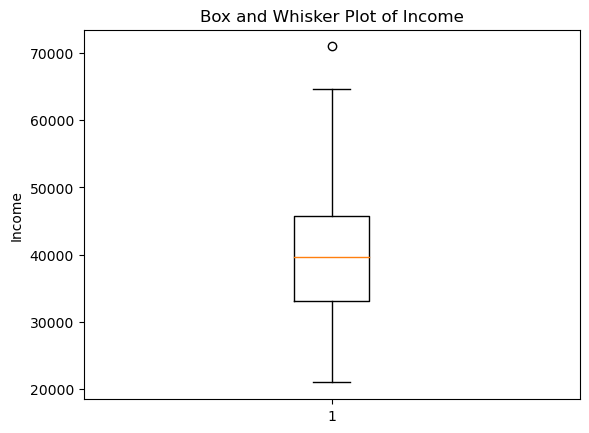

In [27]:
fig, ax = plt.subplots()
ax.boxplot(beer['Income'].dropna())
ax.set_title('Box and Whisker Plot of Income')
ax.set_ylabel('Income')
plt.show()

In [ ]:
# Question 1: Is there any correlation between Age and Income?

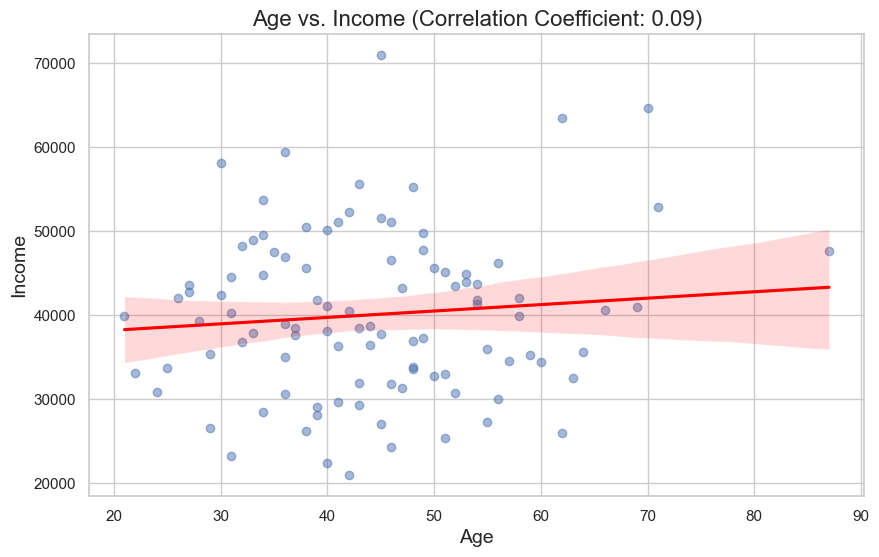

Pearson Correlation Coefficient (r): 0.09456949482972121


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation coefficient
correlation_coefficient = beer['Age'].corr(beer['Income'])

# Set style for seaborn
sns.set(style="whitegrid")

# Create scatter plot with regression line and correlation coefficient annotation
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Income', data=beer, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Age vs. Income (Correlation Coefficient: {correlation_coefficient:.2f})', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.grid(True)
plt.show()

print("Pearson Correlation Coefficient (r):", correlation_coefficient)


In [38]:
# There is no correlation between Age and Income. We can see this because the regression line is almost flat
# and the points in the above graph are all randomly spread out; no pattern indicated.

In [ ]:
# Question 2: Do a Male and a Female have a difference in average Income?

In [51]:
from scipy.stats import ttest_ind

# Separate Income based on Gender
income_male = beer[beer['Gender'] == 1]['Income']
income_female = beer[beer['Gender'] == 0]['Income']

# Perform t-test
t_statistic, p_value = ttest_ind(income_male, income_female, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in Income between Male and Female.")
else:
    print("There is no significant difference in Income between Male and Female.")


T-statistic: 0.4659576515850957
P-value: 0.6422807819211965
There is no significant difference in Income between Male and Female.


/Users/aryankalaria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aryankalaria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aryankalaria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


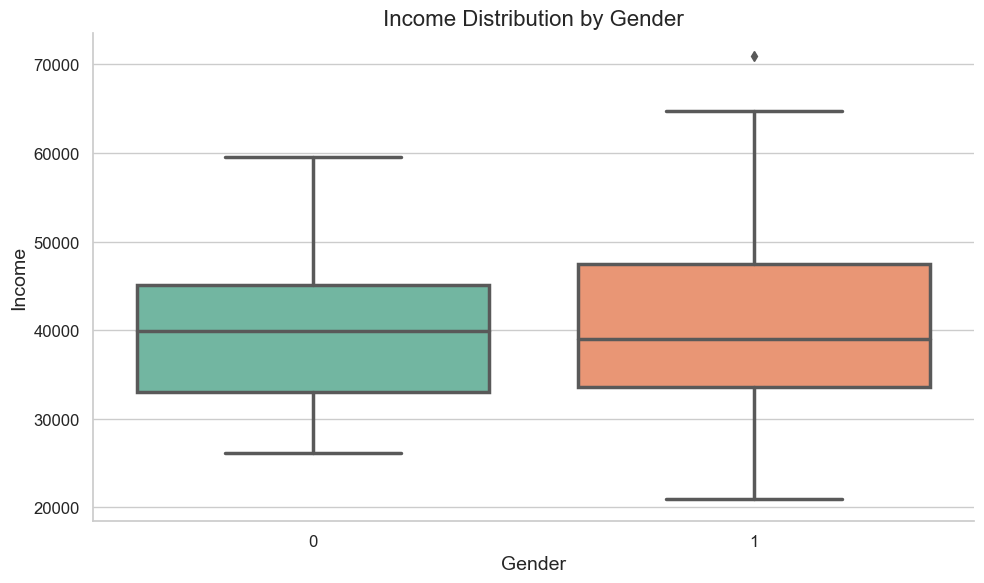

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn
sns.set(style="whitegrid")

# Create box plot for Income by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Income', data=beer, palette='Set2', linewidth=2.5)
sns.despine()  # Remove the top and right spines
plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [55]:
# Therefore, on average, the average income of a person is not affected by that person's gender.

In [56]:
# Question 3: What is the association between Gender and Preference?

In [57]:
from scipy.stats import chi2_contingency

# Create a contingency table of Gender and Preference
contingency_table = pd.crosstab(beer['Gender'], beer['Preference'])

# Perform chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between Gender and Preference.")
else:
    print("There is no significant association between Gender and Preference.")


Chi-square statistic: 1.4687882496940023
P-value: 0.2255369779458134
Degrees of freedom: 1
Expected frequencies table:
[[21.5 21.5]
 [28.5 28.5]]
There is no significant association between Gender and Preference.


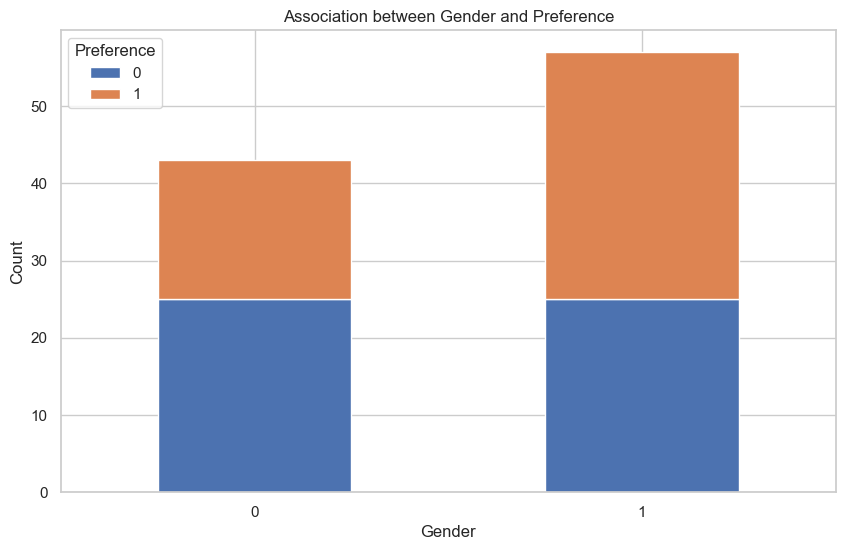

In [70]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Association between Gender and Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Preference')
plt.show()

In [59]:
# Therefore, in general, there is no significant relation between gender and preference of beer.

In [60]:
# Question 4: Is there an association between preference and income?

In [63]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[beer[beer['Preference'] == pref]['Income'] for pref in beer['Preference'].unique()])

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between Preference and Income.")
else:
    print("There is no significant association between Preference and Income.")


F-statistic: 34.54463643166953
P-value: 5.754106859554893e-08
There is a significant association between Preference and Income.


/Users/aryankalaria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aryankalaria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aryankalaria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


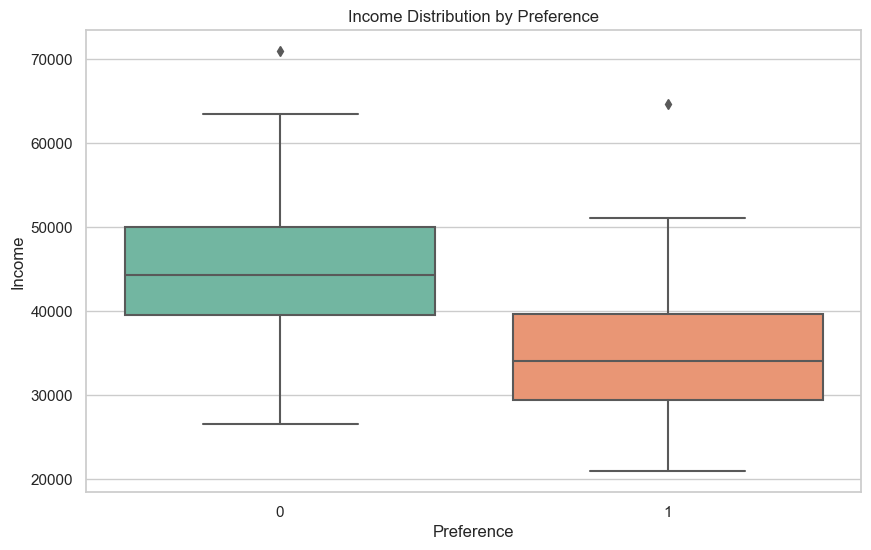

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn
sns.set(style="whitegrid")

# Create box plot for Income by Preference
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preference', y='Income', data=beer, palette='Set2')
plt.title('Income Distribution by Preference')
plt.xlabel('Preference')
plt.ylabel('Income')
plt.show()


In [ ]:
# Therefore, there is an association between income and beer preference. From the plot, we can see that
# people with higher income ($40,000 to $50,000 approx.) tend to prefer Regular beer over Light beer, whereas
# people with a lower income ($30,000 to $40,000 approx.) tend to prefer Light beer.